In [1]:
import json
import argparse
from src.LogicState import LogicState
from src.PWMWriter import PWMWriter
from src.Simulator import Simulator
from src.Plotter import Plotter
from src.util import copy_pwm_files

############## PARAMETERS ###################
max_dev = 50    # Default 50
dev_wf = 30     # Default 20
fig_type = ['pdf', 'png', 'svg'][1]
config_file = './configs/SSAx1.json'

with open(config_file, 'r') as f:
    config = json.load(f)

C:\Users\Shype\Desktop\Paper in work\[In Work] MASAM\src\Plotter.py:166: SyntaxWarning: invalid escape sequence '\m'
  axs[idx].set_xlabel("Time in $\mu$s", fontsize=24, labelpad=0)


Verify the functionality of the algorithm and present a state history of each memristor:

In [2]:
# Check if the algorithm is valid and the resulting states are correct
LS = LogicState(config)
LS.calc_algorithm(plot_tt=True)
print("\n--------------- Logic States verified! ---------------\n")

2024-08-07 21:52:49,523 - Simulation - INFO - Initializing class LogicState
2024-08-07 21:52:49,524 - Simulation - INFO - Applied Operations: ['F[w1]']
2024-08-07 21:52:49,524 - Simulation - INFO - Applied Operations: ['F[w1]', 'I[b,w1]']
2024-08-07 21:52:49,525 - Simulation - INFO - Applied Operations: ['F[w1]', 'I[b,w1]', 'I[a,w1]']
2024-08-07 21:52:49,525 - Simulation - INFO - Applied Operations: ['F[w1]', 'I[b,w1]', 'I[a,w1]', 'F[a]', 'I[w1,c]']
2024-08-07 21:52:49,526 - Simulation - INFO - Applied Operations: ['F[w1]', 'I[b,w1]', 'I[a,w1]', 'F[a]', 'I[w1,c]', 'I[c,a]', 'F[w1]']


#####################################
Applied operations: ['F[w1]']
a | b | c | w1|
--------------------
0 | 0 | 0 | 0
0 | 0 | 1 | 0
0 | 1 | 0 | 0
0 | 1 | 1 | 0
1 | 0 | 0 | 0
1 | 0 | 1 | 0
1 | 1 | 0 | 0
1 | 1 | 1 | 0
#####################################
#####################################
Applied operations: ['F[w1]', 'I[b,w1]']
a | b | c | w1|
--------------------
0 | 0 | 0 | 1
0 | 0 | 1 | 1
0 | 1 | 0 | 0
0 | 1 | 1 | 0
1 | 0 | 0 | 1
1 | 0 | 1 | 1
1 | 1 | 0 | 0
1 | 1 | 1 | 0
#####################################
#####################################
Applied operations: ['F[w1]', 'I[b,w1]', 'I[a,w1]']
a | b | c | w1|
--------------------
0 | 0 | 0 | 1
0 | 0 | 1 | 1
0 | 1 | 0 | 1
0 | 1 | 1 | 1
1 | 0 | 0 | 1
1 | 0 | 1 | 1
1 | 1 | 0 | 0
1 | 1 | 1 | 0
#####################################
#####################################
Applied operations: ['F[w1]', 'I[b,w1]', 'I[a,w1]', 'F[a]', 'I[w1,c]']
a | b | c | w1|
--------------------
0 | 0 | 0 | 1
0 | 0 | 1 | 1
0 | 1 | 0 | 1
0 | 1 | 1 | 1


## Automatically create PWM signals
Instantiate a PWMWriter class, automatically write PWM files for the chosen algorithm in the defined topology, and temporary store them in the **PWM_output** 
folder for debugging:


In [3]:
# Automatically create PWM signals and store them in "PWM_output"
PWM = PWMWriter(config)
PWM.eval_algo()
print("\n--------------- PWM Signals created! ---------------\n")

2024-08-07 21:52:52,587 - Simulation - INFO - Initializing PWM Writer
2024-08-07 21:52:52,587 - Simulation - INFO - File ./outputs/PWM_output/a.csv created!
2024-08-07 21:52:52,588 - Simulation - INFO - File ./outputs/PWM_output/b.csv created!
2024-08-07 21:52:52,588 - Simulation - INFO - File ./outputs/PWM_output/c.csv created!
2024-08-07 21:52:52,589 - Simulation - INFO - File ./outputs/PWM_output/w1.csv created!
2024-08-07 21:52:52,589 - Simulation - INFO - File ./outputs/PWM_output/a_sw.csv created!
2024-08-07 21:52:52,590 - Simulation - INFO - File ./outputs/PWM_output/b_sw.csv created!
2024-08-07 21:52:52,590 - Simulation - INFO - File ./outputs/PWM_output/c_sw1.csv created!
2024-08-07 21:52:52,591 - Simulation - INFO - File ./outputs/PWM_output/c_sw2.csv created!
2024-08-07 21:52:52,591 - Simulation - INFO - File ./outputs/PWM_output/w1_sw1.csv created!
2024-08-07 21:52:52,592 - Simulation - INFO - File ./outputs/PWM_output/w1_sw2.csv created!
2024-08-07 21:52:52,596 - Simulatio

File ./outputs/PWM_output/a.csv created!
File ./outputs/PWM_output/b.csv created!
File ./outputs/PWM_output/c.csv created!
File ./outputs/PWM_output/w1.csv created!
File ./outputs/PWM_output/a_sw.csv created!
File ./outputs/PWM_output/b_sw.csv created!
File ./outputs/PWM_output/c_sw1.csv created!
File ./outputs/PWM_output/c_sw2.csv created!
File ./outputs/PWM_output/w1_sw1.csv created!
File ./outputs/PWM_output/w1_sw2.csv created!
PWM Files written successfully

--------------- PWM Signals created! ---------------



Overwrite the current algorithm in the chosen topology folder:

In [4]:
# Copy the files to the folder of the corresponding topology (This removes the old files !)
copy_pwm_files(config, PWM.step_size)
print(f"\n--------- Files of {config["topology"]} topology overwritten! --------\n")


--------- Files of Semi-Serial topology overwritten! --------



## Illustrate the deviation experiments
Instantiate a Plotter class in which the Simulator is embedded for convenience. \
The energy consumption is automatically calculated.

In [5]:
PLT = Plotter(config)

2024-08-07 21:52:56,745 - Simulation - INFO - Initializing Plotter
2024-08-07 21:52:56,746 - Simulation - INFO - Initializing Simulator
2024-08-07 21:52:56,748 - Simulation - INFO - Started calculating energy consumption


Calculating energy consumption:


100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
2024-08-07 21:53:04,893 - Simulation - INFO - Average Energy consumption: 1.4835165e-09
2024-08-07 21:53:04,893 - Simulation - INFO - Energy over Combinations: [7.244580000000001e-10, 1.5211049999999998e-09, 1.0117365e-09, 1.8075749999999997e-09, 1.143051e-09, 1.939005e-09, 1.4672114999999998e-09, 2.25399e-09]


Average Energy consumption: 1.4835165e-09
Energy over Combination: [7.244580000000001e-10, 1.5211049999999998e-09, 1.0117365e-09, 1.8075749999999997e-09, 1.143051e-09, 1.939005e-09, 1.4672114999999998e-09, 2.25399e-09]


The three main plot options are:
1) plot_deviation_scatter()
2) plot_deviation_range()
3) plot_waveforms_with_deviation()

If the simulations have been run already (The files of the last simulation is stored in the folder **outputs**), the parameter **recompute** can be set **False**.

2024-08-07 17:38:20,920 - Simulation - INFO - Initializing Plotter
2024-08-07 17:38:20,920 - Simulation - INFO - Initializing Simulator
2024-08-07 17:38:20,923 - Simulation - INFO - Started calculating energy consumption


Calculating energy consumption:


100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
2024-08-07 17:38:29,058 - Simulation - INFO - Average Energy consumption: 4.825395e-09
2024-08-07 17:38:29,058 - Simulation - INFO - Energy over Combinations: [2.819214e-09, 4.660551e-09, 4.458204e-09, 6.07797e-09, 3.35781e-09, 5.222997e-09, 5.217723e-09, 6.7886909999999995e-09]


Average Energy consumption: [2.819214e-09, 4.660551e-09, 4.458204e-09, 6.07797e-09, 3.35781e-09, 5.222997e-09, 5.217723e-09, 6.7886909999999995e-09]
Energy over Combination: 4.825395e-09

--------- Deviation Experiments completed --------



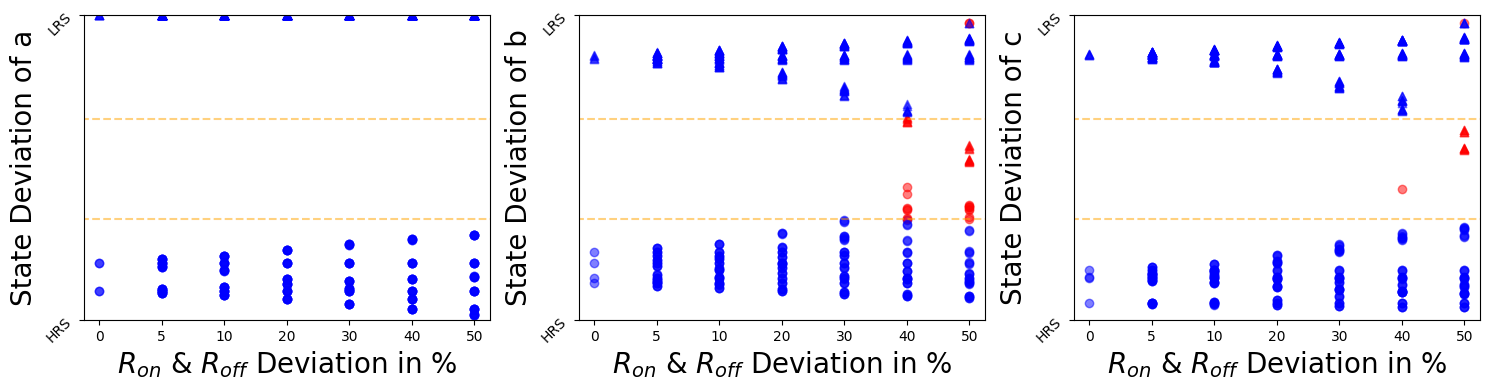

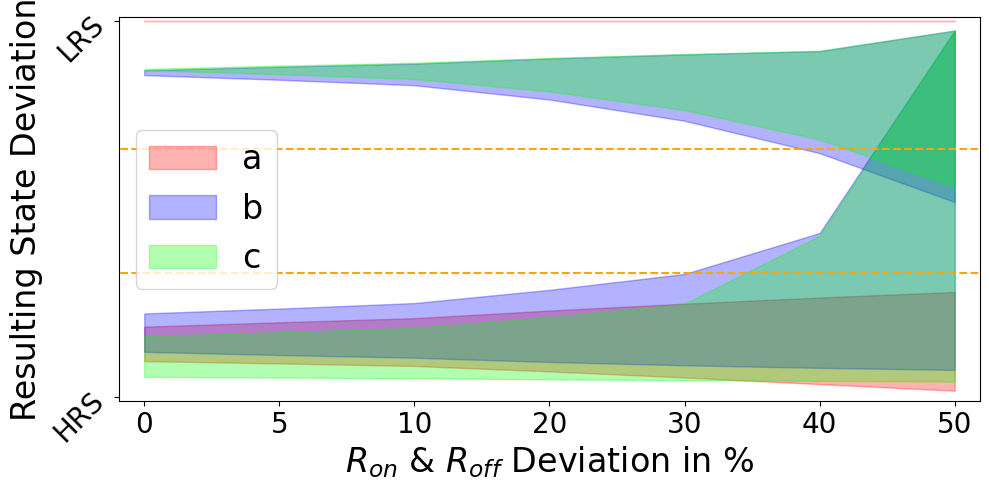

In [6]:
PLT.plot_deviation_scatter(max_dev=max_dev, recompute=True, fig_type=fig_type)
PLT.plot_deviation_range(max_dev=max_dev, recompute=False, fig_type=fig_type)
print(f"\n--------- Deviation Experiments completed --------\n")

Create waveform images with deviation ranges for all input combinations with deviation **dev_wf**:


--------- Waveforms with deviation 30 saved --------



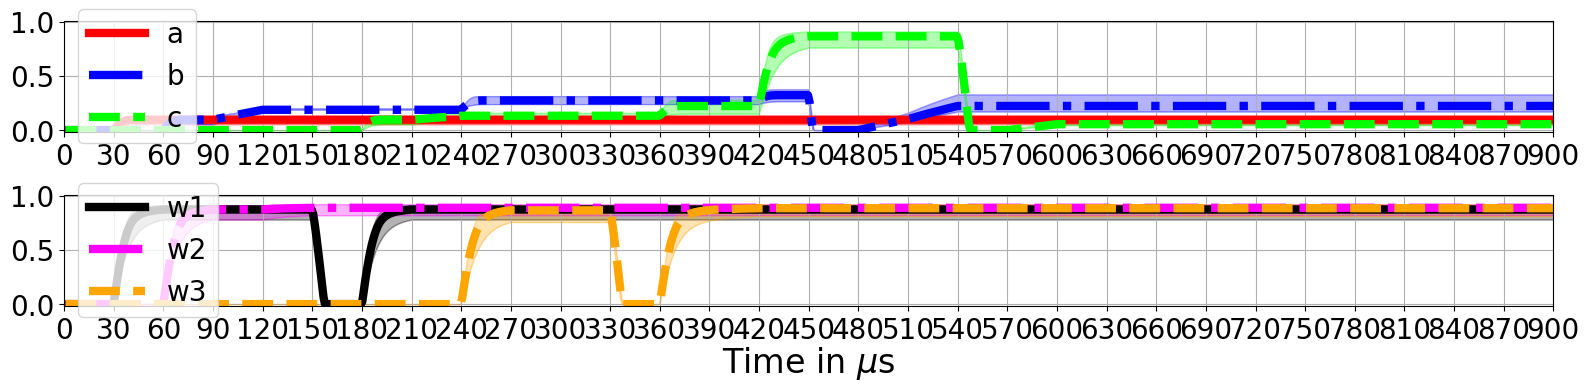

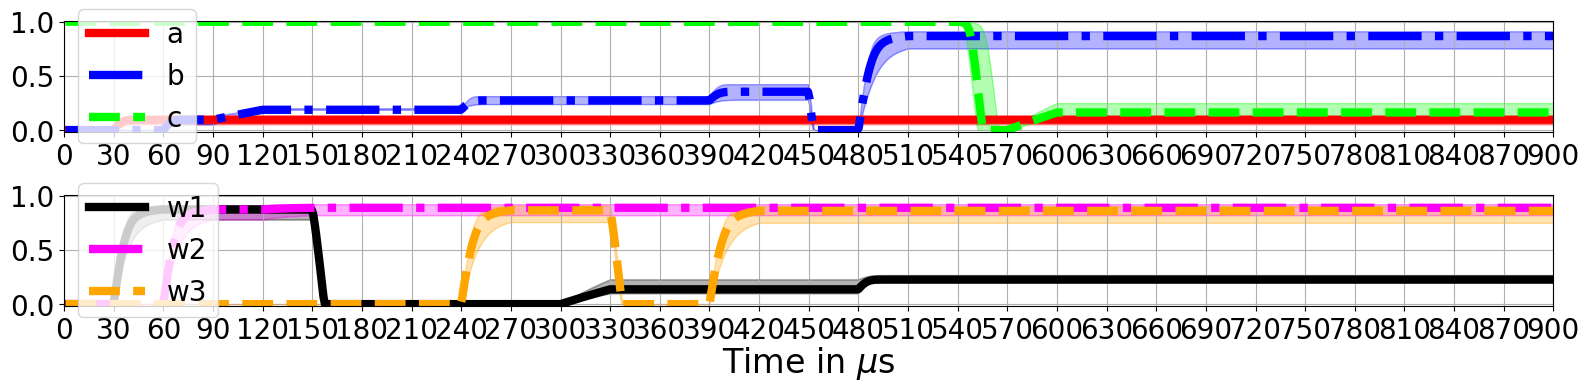

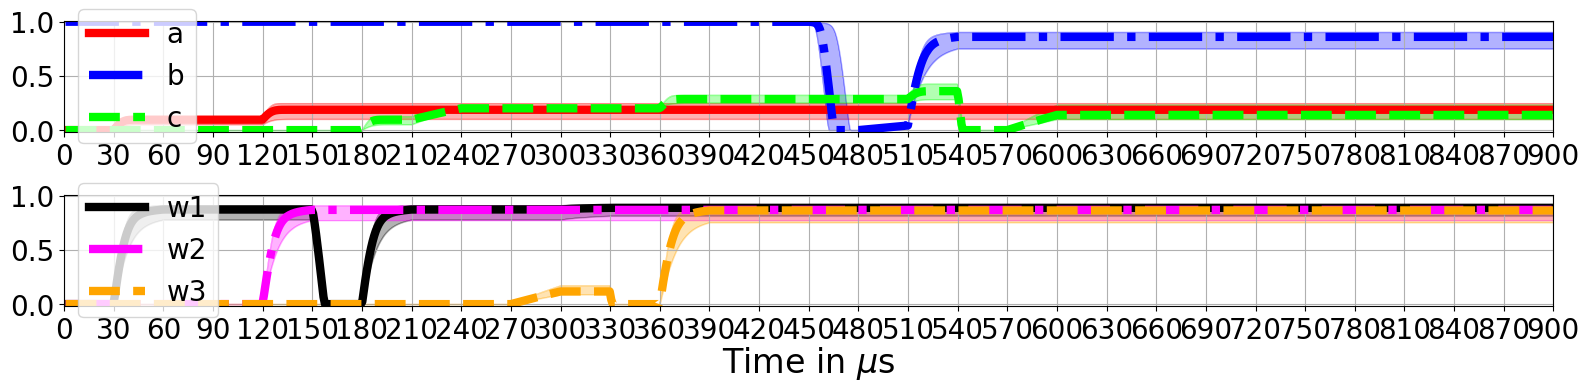

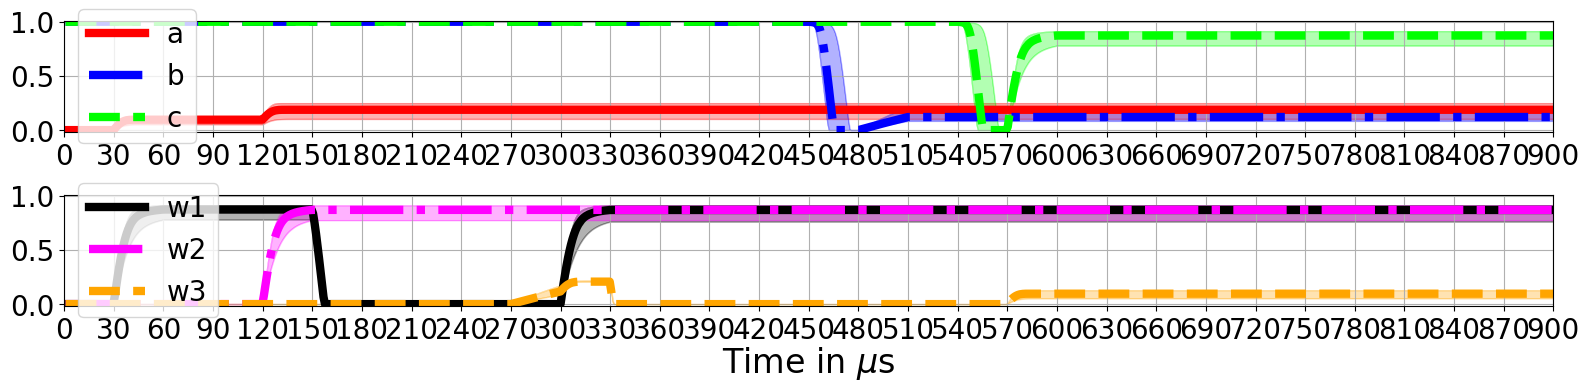

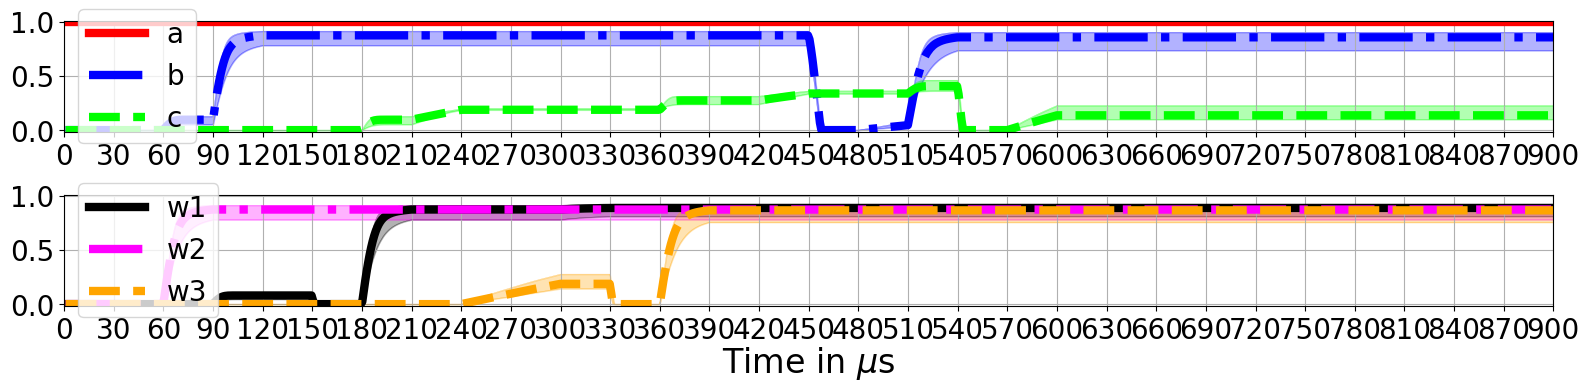

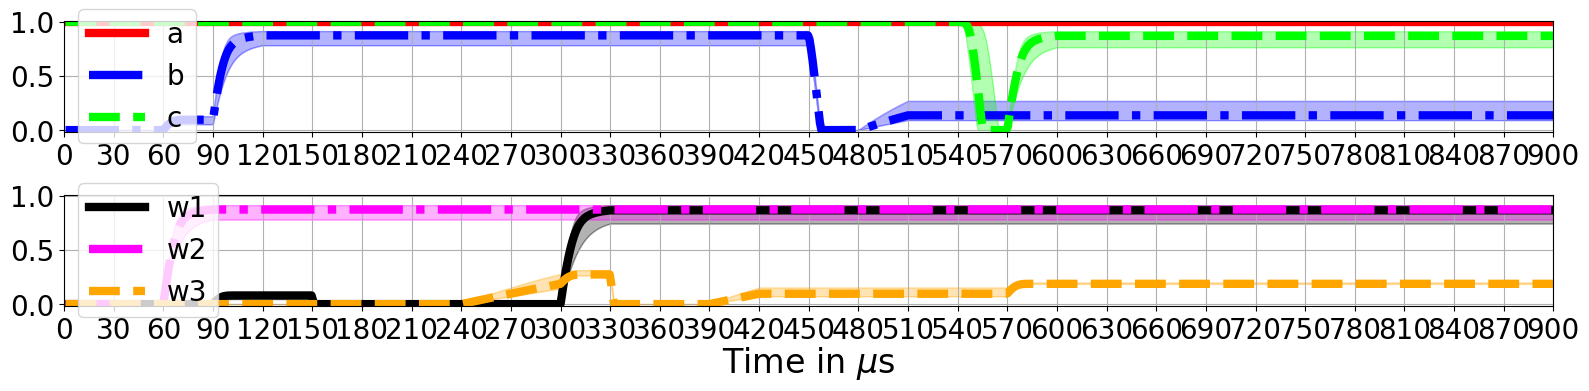

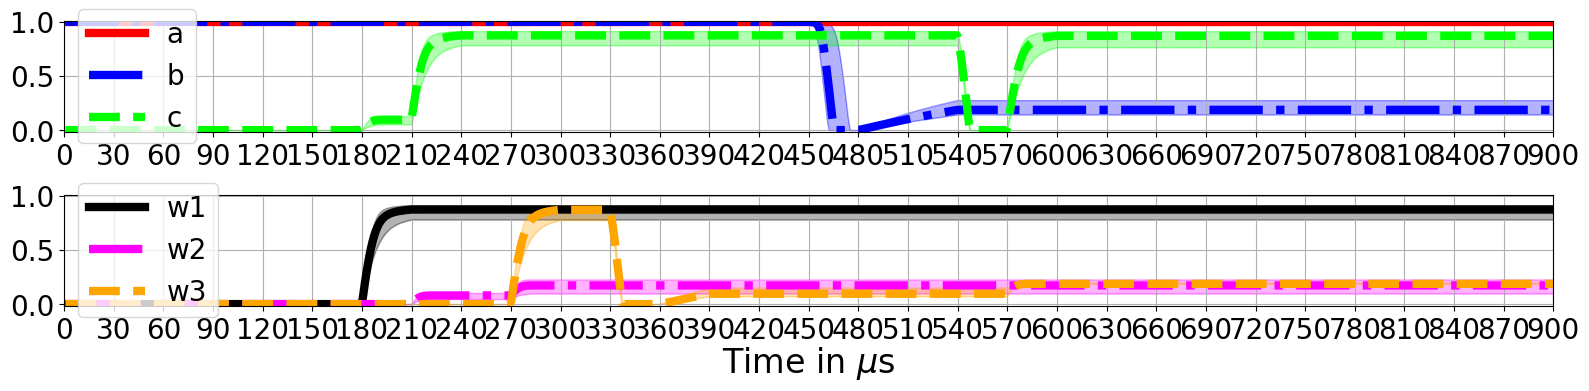

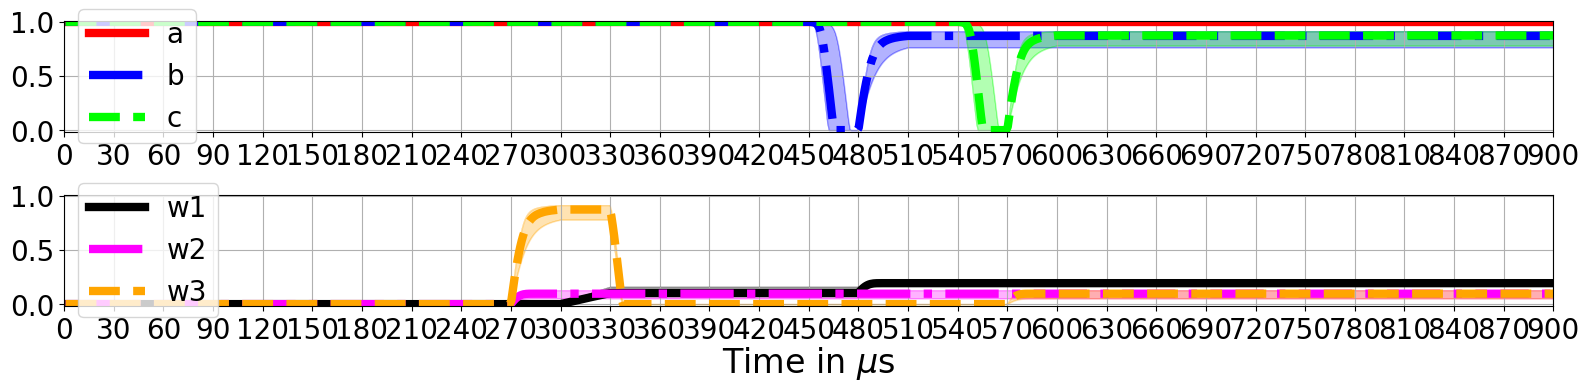

In [7]:
for comb in range(8):
    comb_str = bin(comb)[2:].zfill(3)
    PLT.plot_waveforms_with_deviation(comb_str, dev=dev_wf, recompute=False, fig_type=fig_type)
print(f"\n--------- Waveforms with deviation {dev_wf} saved --------\n")

Illustrate a single input combination with unique parameters:

2024-08-07 21:53:06,330 - Simulation - INFO - Started recomputing deviation 20
2024-08-07 21:53:06,341 - Simulation - INFO - Started calculating deviation: 20


Calculating deviation 20:


100%|██████████| 8/8 [01:13<00:00,  9.20s/it]
2024-08-07 21:54:19,983 - Simulation - INFO - Results of experiments with deviation: 20 saved in "outputs/deviation_results/dev_20"


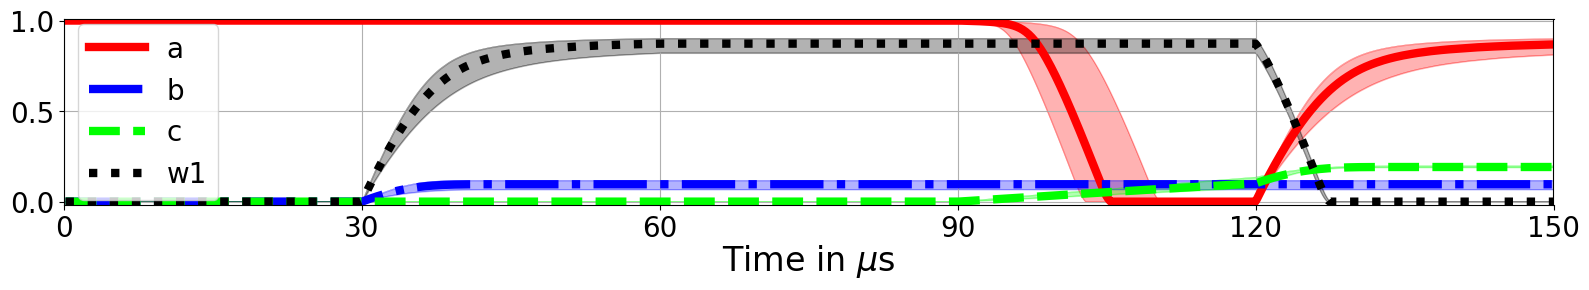

In [6]:
comb = '100'
dev = 20
fig_type_s = 'png'
recompute_s = True
PLT.plot_waveforms_with_deviation(comb, dev=dev, recompute=recompute_s, fig_type=fig_type_s, plots_per_subfigure=4)

## Store the results
Save created images and state deviation files in **OUTPUT_FILES**


In [5]:
PLT.save_algorithm_files(f"{config["algorithm"].split(".")[0]}")